<a href="https://colab.research.google.com/github/Sriharshitha842/ML_LAB/blob/main/19BCD7246_ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VERIFYING THE ACCURACIES OF VARIOUS MACHINE LEARNING ALGORITHMS ON GENDER CLASSIFICATION DATASET TO CLASSIFY THE GENDER (BINARY CLASSIFICATION PROBLEM)** 

**Import essential libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#for data analysis and data visualization 
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning algorihms
#(1)Decision Tree
#(2)Random Forest
#(3)k-NN
#(4)Logistic Regression
#(5)SVM (Linear)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

**Load the dataset**

In [ ]:
data = pd.read_csv('/content/sample_data/gender_classification.csv')

**Analyze by describing data**

In [ ]:
data.shape

(5001, 8)

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Male
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Male
5000,1,15.4,5.4,1,1,1,1,Male


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
#info of various features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [ ]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.513897
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.499857
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000


**Visualization of gender Column**

In [ ]:
data.gender.value_counts()

1    2570
0    2431
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of Male and Female')

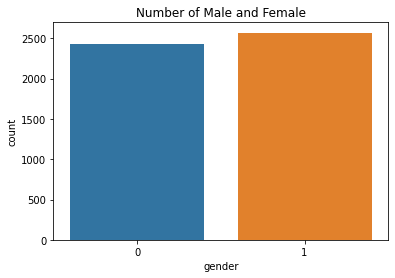

In [ ]:
sns.countplot(data.gender)
plt.xlabel("gender")
plt.title("Number of Male and Female")

**Splitting into test and train datasets**

In [ ]:
X = data.iloc[:,0:7]

In [ ]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [ ]:
Y = data['gender'].ravel()

In [ ]:
Y

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.30,random_state=42)

In [ ]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((3500, 7), (1501, 7), (3500,), (1501,))

**Testing the accuracy of various ML Algorithms on Gender Classification dataset**

**CONFUSION MATRIX :**

**If we consider a binary classification problem,**

**1. Confusion_Matrix[0][0] = True Negative(TN)**

**2. Confusion_Matrix[0][1] = False Postive(FP)**

**3. Confusion_Matrix[1][0] = False Negative(FN)**

**4. Confusion_Matrix[1][1] = True Postive(TP)**









**ACCURACY :**

**Accuracy = (TP+TN)/(TP+TN+FP+FN)**

**PRECISION:**

**Precision = TP/(TP+FP)**

**RECALL:**

**Recall = TP/(TP+FN)**

**F1 SCORE :**

**F1 Score = 2 * Precision * Recall/(Precision+Recall)**

Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[627  85]
 [108 681]]


In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

#accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)

#precision
precision = TP/(TP+FP)

#recall
recall = TP/(TP+FN)

#f1_score 
f1_score = (2*(precision)*(recall))/(precision+recall)

print("Accuracy = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1_Score = ",f1_score)

Accuracy =  0.871419053964024
Precision =  0.8890339425587467
Recall =  0.8631178707224335
F1_Score =  0.8758842443729904


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(X_train, Y_train)
Y_pred1 = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test, Y_pred1)
print('Confusion Matrix')
print(cm1)

Confusion Matrix
[[645  67]
 [ 84 705]]


In [ ]:
TP1 = cm1[1][1]
TN1 = cm1[0][0]
FP1 = cm1[0][1]
FN1 = cm1[1][0]

#accuracy
accuracy_1 = (TP1+TN1)/(TP1+TN1+FP1+FN1)

#precision
precision_1 = TP1/(TP1+FP1)

#recall
recall_1 = TP1/(TP1+FN1)

#f1_score 
f1_score_1 = (2*(precision_1)*(recall_1))/(precision_1+recall_1)

print("Accuracy = ",accuracy_1)
print("Precision = ",precision_1)
print("Recall = ",recall_1)
print("F1_Score = ",f1_score_1)

Accuracy =  0.899400399733511
Precision =  0.9132124352331606
Recall =  0.8935361216730038
F1_Score =  0.9032671364509929


K-NN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(Y_test, Y_pred2)
print('Confusion Matrix')
print(cm2)

Confusion Matrix
[[675  37]
 [ 84 705]]


In [ ]:
TP2 = cm2[1][1]
TN2 = cm2[0][0]
FP2 = cm2[0][1]
FN2 = cm2[1][0]

#accuracy
accuracy_2 = (TP2+TN2)/(TP2+TN2+FP2+FN2)

#precision
precision_2 = TP2/(TP2+FP2)

#recall
recall_2 = TP2/(TP2+FN2)

#f1_score 
f1_score_2 = (2*(precision_2)*(recall_2))/(precision_2+recall_2)

print("Accuracy = ",accuracy_2)
print("Precision = ",precision_2)
print("Recall = ",recall_2)
print("F1_Score = ",f1_score_2)

Accuracy =  0.9193870752831446
Precision =  0.9501347708894878
Recall =  0.8935361216730038
F1_Score =  0.9209666884389287


logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred3 = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(Y_test, Y_pred3)
print('Confusion Matrix')
print(cm3)

Confusion Matrix
[[655  57]
 [ 73 716]]


In [ ]:
TP3 = cm3[1][1]
TN3 = cm3[0][0]
FP3 = cm3[0][1]
FN3 = cm3[1][0]
#accuracy
accuracy_3 = (TP3+TN3)/(TP3+TN3+FP3+FN3)

#precision
precision_3 = TP3/(TP3+FP3)

#recall
recall_3 = TP3/(TP3+FN3)

#f1_score 
f1_score_3 = (2*(precision_3)*(recall_3))/(precision_3+recall_3)

print("Accuracy = ",accuracy_3)
print("Precision = ",precision_3)
print("Recall = ",recall_3)
print("F1_Score = ",f1_score_3)

Accuracy =  0.9133910726182545
Precision =  0.926261319534282
Recall =  0.9074778200253485
F1_Score =  0.9167733674775929


SVM (linear)


In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred4 = linear_svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(Y_test, Y_pred4)
print('Confusion Matrix')
print(cm4)

Confusion Matrix
[[648  64]
 [ 63 726]]


In [ ]:
TP4 = cm4[1][1]
TN4 = cm4[0][0]
FP4 = cm4[0][1]
FN4 = cm4[1][0]
#accuracy
accuracy_4 = (TP4+TN4)/(TP4+TN4+FP4+FN4)

#precision
precision_4 = TP4/(TP4+FP4)

#recall
recall_4 = TP4/(TP4+FN4)

#f1_score 
f1_score_4 = (2*(precision_4)*(recall_4))/(precision_4+recall_4)

print("Accuracy = ",accuracy_4)
print("Precision = ",precision_4)
print("Recall = ",recall_4)
print("F1_Score = ",f1_score_4)

Accuracy =  0.9153897401732178
Precision =  0.9189873417721519
Recall =  0.9201520912547528
F1_Score =  0.9195693476884103
